In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
sudo: fc-cache-fv: command not found


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data visualization/subway.xlsx')
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2025-06,1호선,150,서울역,1858453,1740163,265250,246906,NaN,NaN,NaN,NaN
1,2025-06,1호선,151,시청,624515,634650,102884,101497,NaN,NaN,NaN,NaN
2,2025-06,1호선,152,종각,905765,892520,148456,137654,NaN,행 레이블,합계 : 유임승차,합계 : 무임승차
3,2025-06,1호선,153,종로3가,467092,412603,294130,269581,NaN,1호선,5573515,2035705
4,2025-06,1호선,154,종로5가,431733,422774,250657,243384,NaN,2호선,35349252,5248725
...,...,...,...,...,...,...,...,...,...,...,...,...
617,2025-06,신림선,4407,당곡,101726,95064,44751,42671,NaN,NaN,NaN,NaN
618,2025-06,신림선,4408,신림,47339,57553,22043,24721,NaN,NaN,NaN,NaN
619,2025-06,신림선,4409,서원,77214,65351,28060,26978,NaN,NaN,NaN,NaN
620,2025-06,신림선,4410,서울대벤처타운,222689,196485,72761,72139,NaN,NaN,NaN,NaN


In [4]:
df['유임승차'].max()

2067068

In [5]:
df.iloc[[df['유임승차'].idxmax()]]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
48,2025-06,2호선,239,홍대입구,2067068,2234604,104849,102334,NaN,NaN,NaN,NaN


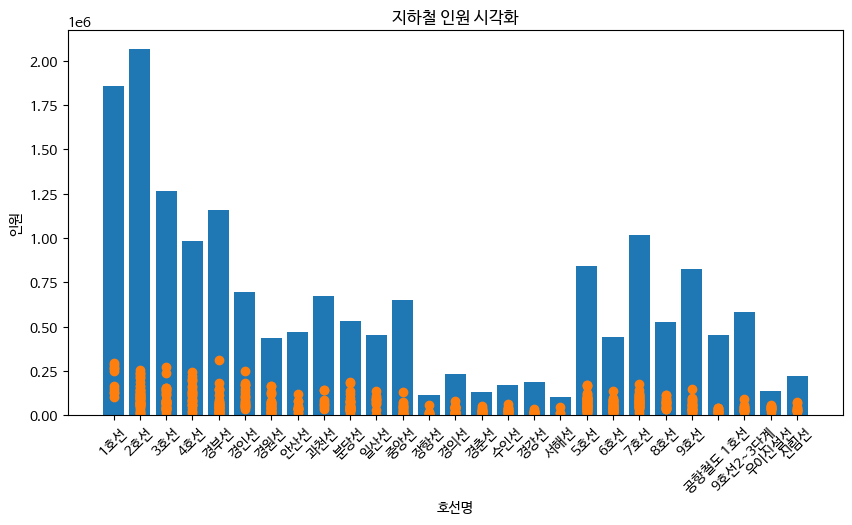

In [6]:
plt.figure(figsize=(10,5))
plt.bar(df['호선명'], df['유임승차'])
plt.scatter(df['호선명'], df['무임승차'])
plt.title('지하철 인원 시각화')
plt.xlabel('호선명')
plt.xticks(rotation=45)
plt.ylabel('인원')
plt.show()

In [12]:
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2025-06,1호선,150,서울역,1858453,1740163,265250,246906,NaN,NaN,NaN,NaN
1,2025-06,1호선,151,시청,624515,634650,102884,101497,NaN,NaN,NaN,NaN
2,2025-06,1호선,152,종각,905765,892520,148456,137654,NaN,행 레이블,합계 : 유임승차,합계 : 무임승차
3,2025-06,1호선,153,종로3가,467092,412603,294130,269581,NaN,1호선,5573515,2035705
4,2025-06,1호선,154,종로5가,431733,422774,250657,243384,NaN,2호선,35349252,5248725
...,...,...,...,...,...,...,...,...,...,...,...,...
617,2025-06,신림선,4407,당곡,101726,95064,44751,42671,NaN,NaN,NaN,NaN
618,2025-06,신림선,4408,신림,47339,57553,22043,24721,NaN,NaN,NaN,NaN
619,2025-06,신림선,4409,서원,77214,65351,28060,26978,NaN,NaN,NaN,NaN
620,2025-06,신림선,4410,서울대벤처타운,222689,196485,72761,72139,NaN,NaN,NaN,NaN


In [13]:
table1 = pd.pivot_table(df, index=['호선명'], values=['유임승차', '무임승차'], aggfunc='sum')
table1

,무임승차,유임승차
호선명,,
1호선,2035705,5573515
2호선,5248725,35349252
3호선,3044362,12491264
4호선,2945251,12312499
5호선,3924655,15167722
6호선,1896560,8038964
7호선,3334330,13580106
8호선,1292249,4635457
9호선,1307351,6956309


In [14]:
table2 = pd.pivot_table(df, index=['호선명', '지하철역'], values=['유임승차', '무임승차'], aggfunc='sum')
table2

무임승차     유임승차
호선명 지하철역                 
1호선 동대문   132091   240768
    동묘앞   168183   153551
    서울역   265250  1858453
    시청    102884   624515
    신설동   123345   289504
...          ...      ...
중앙선 원덕      7421     4598
    중랑     53686   108072
    지평      1133      723
    팔당      9631    17592
    회기    132117   653127

[622 rows x 2 columns]

In [15]:
table1.sort_values('무임승차', ascending=False)

,무임승차,유임승차
호선명,,
2호선,5248725,35349252
5호선,3924655,15167722
7호선,3334330,13580106
3호선,3044362,12491264
4호선,2945251,12312499
경부선,2405327,10972082
분당선,2095519,8510902
1호선,2035705,5573515
경인선,2023807,5852004


In [16]:
table1

,무임승차,유임승차
호선명,,
1호선,2035705,5573515
2호선,5248725,35349252
3호선,3044362,12491264
4호선,2945251,12312499
5호선,3924655,15167722
6호선,1896560,8038964
7호선,3334330,13580106
8호선,1292249,4635457
9호선,1307351,6956309


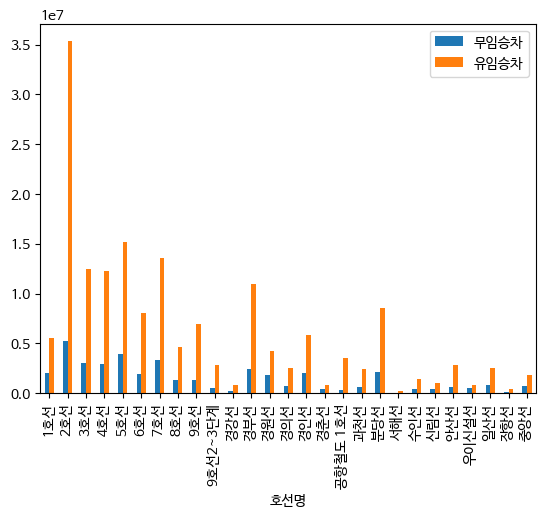

In [22]:
table1.plot(kind='bar')
plt.show()

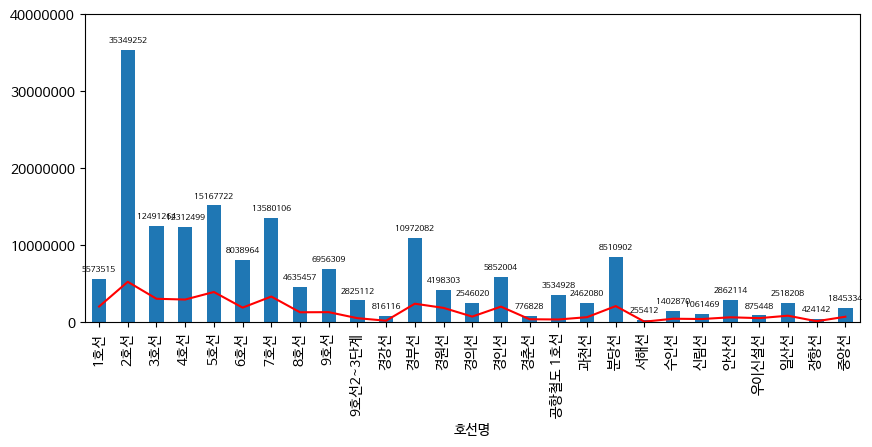

In [34]:
plt.figure(figsize=(10,4))
table1['유임승차'].plot(kind='bar')
table1['무임승차'].plot(kind='line', color='red')
plt.xticks(rotation=90)
plt.ylim(0,40000000)
plt.yticks([0,10000000,20000000,30000000,40000000],['0','10000000','20000000','30000000','40000000'])
for i, v in enumerate(table1['유임승차']):
  plt.text(i, v+1000000, str(v), ha='center', size=6)
plt.show()

In [35]:
table1 = pd.pivot_table(df, index=["호선명"], values=["유임승차", "무임승차"], aggfunc="sum")
table1

,무임승차,유임승차
호선명,,
1호선,2035705,5573515
2호선,5248725,35349252
3호선,3044362,12491264
4호선,2945251,12312499
5호선,3924655,15167722
6호선,1896560,8038964
7호선,3334330,13580106
8호선,1292249,4635457
9호선,1307351,6956309


In [36]:
table1 = table1.reset_index()
table1

,호선명,무임승차,유임승차
0,1호선,2035705,5573515
1,2호선,5248725,35349252
2,3호선,3044362,12491264
3,4호선,2945251,12312499
4,5호선,3924655,15167722
5,6호선,1896560,8038964
6,7호선,3334330,13580106
7,8호선,1292249,4635457
8,9호선,1307351,6956309
9,9호선2~3단계,526191,2825112


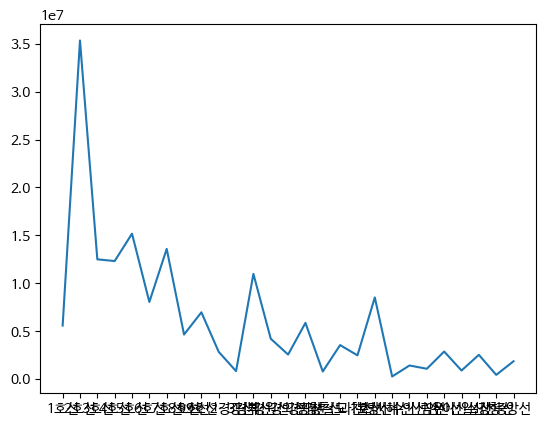

In [37]:
plt.plot(table1['호선명'], table1['유임승차'])
plt.show()